In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
from scipy.stats import linregress
import statsmodels.api as sm

dataframe = pd.read_stata('dataset.dta')
dataframe.to_csv('dta_to_csv_file.csv')
pd.io.stata.StataReader('dataset.dta').variable_labels()

{'id': 'identification number',
 'ost': 'east/west at draw',
 'branche': 'share in 22 ecnomic sectors',
 'filter': 'innovator filter',
 'gruend': 'Start-ups',
 'zusamm': 'merger',
 'zusamm10': 'increase in sales because of merger',
 'geschl': 'parts of the company closed',
 'geschl10': 'decrease in sales because of closing',
 'absatz': 'Core market of business',
 'um': 'Revenue 2000',
 'ex': 'exports 2000',
 'exno': 'no exports',
 'bges': 'employed',
 'pd': 'Product innovations y/n',
 'pz': 'Process innovation',
 'pa': 'project cancelation',
 'pn': 'Not yet finished projects',
 'pdentw': 'Innovation developer',
 'umneu': 'Revenue share of new/improved products/services',
 'umunw': 'Revenue unchanged products',
 'mneu': 'New products (Y/N)',
 'mneup': 'Revenue share of new products',
 'pzentw': 'Developmer of process innovation',
 'rek': 'cost reduction',
 'rekp': 'cost reduction in percent',
 'iafetz': 'Internal R&D (Y/N)',
 'iafue': 'Expenditure on internal R&D',
 'iavfetz': 'External

In [4]:
#Lees de data in en vorm een dataframe waarop we verder werken
dataSet = pd.read_csv('dta_to_csv_file.csv')


               branche   counter
0              Bergbau  0.791667
1               Chemie  2.055556
2            EDV/Telek  2.000000
3             EHandKfz  0.250000
4             ETechnik  2.400000
5         ErnaehrTabak  1.066667
6          Fahrzeugbau  2.307692
7              GHandel  0.821782
8          GlasKeramik  1.357143
9           HolzPapier  1.086957
10          Kunststoff  2.115385
11                MMSR  2.708333
12        Maschinenbau  2.175824
13              Metall  0.880435
14              Moebel  1.125000
15            Sonst.DL  0.568627
16              TechDL  1.177570
17              Textil  0.848485
18                 UDL  0.553191
19        Verkehr/Post  0.307692
20  Wohnung/Vermietung  0.218182


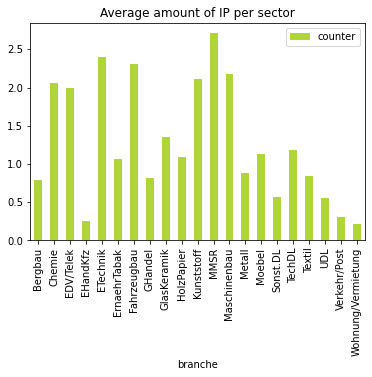

In [5]:
#Start van data manipulatie om linregres uit te voeren
linregresdata = dataSet.filter(items=['um', 'umneu','branche', 'schutz1', 'schutz2', 'schutz3', 'schutz4'
                                      , 'schutz5', 'schutz6', 'schutz7'])
#verwijder alle NAN
linregresdata = linregresdata.dropna()

#Creëer een extra kolom met de aantallen IP per bedrijf
listToAdd = []
for index, row in linregresdata.iterrows():
    counter = 0
    if row['schutz1']=='ja':
        counter+=1
    if row['schutz2']=='ja':
        counter+=1
    if row['schutz3']=='ja':
        counter+=1
    if row['schutz4']=='ja':
        counter+=1
    if row['schutz5']=='ja':
        counter+=1
    if row['schutz6']=='ja':
        counter+=1
    if row['schutz7']=='ja':
            counter+=1
    listToAdd.append(counter)

linregresdata['counter']=listToAdd
linregresdata= linregresdata.replace(['x=0','0<x<5','5<=x<10','10<=x<15','15<=x<20',
                                           '20<=x<30','30<=x<50', '50<=x<75', '75<=x<=100'], 
                                          [0,1,2,3,4,5,6,7,8])


#gemiddelde aantal ip per branche 
linanalysis = linregresdata.groupby('branche', as_index=False)['counter'].mean()
linanalysis.plot(kind='bar', x='branche', y= 'counter', color='#b0d43b')
plt.title("Average amount of IP per sector")
print(linanalysis)
plt.show()


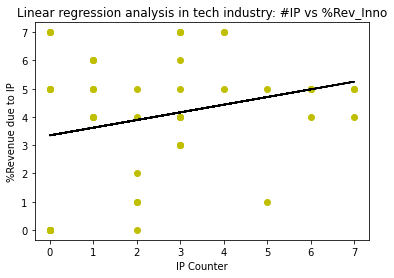

Lin regress of Technical sector: 


LinregressResult(slope=0.2715517241379311, intercept=3.348275862068965, rvalue=0.2545625973851242, pvalue=0.07442043293374, stderr=0.14889808424448106)

In [6]:
#is er een verband tss aantal IP en percentueel revenue door innovatie in de technische sector?
# branches: ETechnik & TechDL
techData = linregresdata.loc[linregresdata['branche']=='ETechnik']
techData.append(linregresdata.loc[linregresdata['branche']=='TechDL'])

#lin regression check
x = techData['counter'].reset_index()
x = x.drop(columns='index')
x = np.array(x).squeeze()

y = techData['umneu'].reset_index()
y = y.drop(columns='index')
y = np.array(y).squeeze()

coef = np.polyfit(x, y, 1)
polynomialFn_Tech = np.poly1d(coef)

plt.title('Linear regression analysis in tech industry: #IP vs %Rev_Inno')
pl.plot(x, y, 'yo', x, polynomialFn_Tech(x), '--k')
plt.xlabel('IP Counter')
plt.ylabel('%Revenue due to IP')
pl.show()
print('Lin regress of Technical sector: ')
#P > 0.05, niet goed dus voor technische sector ookal toont de graf een stijgende lijn
linregress(x, y)


In [7]:
#voor de mooie tabel als beschrijving van de lineaire regress hierboven

#Zet in de call hieronder jouw main variabele alsook de controle vars. door dit te doen indien 'um' als controle
# X = techData['counter', 'um']. De rest is gelijk, alsook het aanpassen van de Y waarde of dergelijke. Weet dat
# ik nu wel enkel heb verwezen naar de techData dataframe. Als je andere datasets hebt, die wat aangepast zijn zoals reeds 
# gedaan is in de code hieronder alsook hierboven, verwijs dan naar die dataframe ipv techData
X = techData['counter']
X = sm.add_constant(X)
Y = techData['umneu']
model = sm.OLS(Y, X).fit()
pred = model.predict(X)
print_model = model.summary()
print(print_model)



                            OLS Regression Results                            
Dep. Variable:                  umneu   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     3.326
Date:                Sun, 10 May 2020   Prob (F-statistic):             0.0744
Time:                        15:42:52   Log-Likelihood:                -110.87
No. Observations:                  50   AIC:                             225.7
Df Residuals:                      48   BIC:                             229.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3483      0.480      6.973      0.0

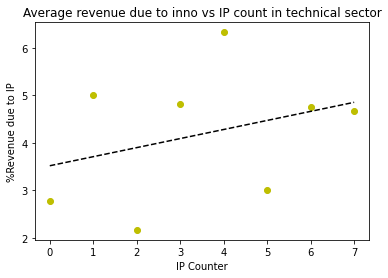

LinregressResult(slope=0.19103812853812857, intercept=3.5193764568764574, rvalue=0.3343210291666325, pvalue=0.4182909180724709, stderr=0.21985852947206463)

In [167]:
#Check the averages of revenue due to innovation given the amount of IP
techData = techData.groupby('counter', as_index=False)['umneu'].mean()
techData.plot(kind='scatter', x='counter', y='umneu', color='blue')
x = techData['counter']
y = techData['umneu']
coef = np.polyfit(x, y, 1)
polynomialFn_Tech_Grouped = np.poly1d(coef)
plt.title('Average revenue due to inno vs IP count in technical sector')
plt.xlabel('IP Counter')
plt.ylabel('%Revenue due to IP')
pl.plot(x, y, 'yo', x, polynomialFn_Tech_Grouped(x), '--k')

#Merk op dat als we de gemiddelden nemen van percentage revenue door innovatie van alle bedrijven op bepaalde counter,
# dat we wel een succesvolle analyse bekomen
plt.show()
#P < 0,05 terwijl hierboven met de ruwe data het insignificant was.
linregress(x, y)


0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
Name: counter, dtype: int64
0    0.954980
1    2.562500
2    3.132075
3    3.702128
4    4.866667
5    4.275000
6    4.500000
7    3.358974
Name: umneu, dtype: float64
Lin regression summary: 


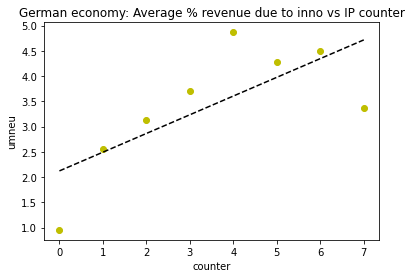

LinregressResult(slope=0.3703425756160571, intercept=2.1228414469771004, rvalue=0.7247067263360558, pvalue=0.0419824383760194, stderr=0.1437544024983685)

In [150]:
generalData = linregresdata.groupby('counter', as_index=False)['umneu'].mean()
generalData.plot(kind= 'scatter', x='counter', y='umneu', color='#b0d43b')

x=generalData['counter']
y=generalData['umneu']

coef = np.polyfit(x, y, 1)
polynomialFn = np.poly1d(coef)
plt.title('German economy: Average % revenue due to inno vs IP counter')
pl.plot(x, y, 'yo', x, polynomialFn(x), '--k')
pl.show()
print("Lin regression summary: ")
linregress(x, y)

In [108]:
#0 to 1 forms of IP
linregresdata2 = linregresdata
entries = []
new = pd.DataFrame()
print(len(linregresdata2['branche']))
for i in range(0, len(linregresdata2['counter'])):
    #print(linregresdata2['counter'].iloc[i] == 0)
    if linregresdata2['counter'].iloc[i] == 0 or linregresdata2['counter'].iloc[i]== 1:
        #print('this' + str(linregresdata2.iloc[i]))
        entries.append(linregresdata2.iloc[i])

zero_one_ip = pd.DataFrame(entries)
#result = pd.concat([linregresdata2, zero_one_ip]).reset_index()
print(zero_one_ip)
verylowipstats = zero_one_ip.groupby('branche', as_index=False)['umneu'].mean()
print(verylowipstats)

1198
            um  umneu       branche schutz1 schutz2 schutz3 schutz4 schutz5  \
2     1.829996      0    HolzPapier    nein    nein    nein    nein    nein   
5     4.129015      0   Fahrzeugbau    nein    nein    nein    nein    nein   
6     2.382081      0        Metall    nein    nein    nein    nein    nein   
7     1.852963      0      EHandKfz    nein    nein    nein    nein    nein   
8     0.637759      0           UDL    nein    nein    nein    nein    nein   
...        ...    ...           ...     ...     ...     ...     ...     ...   
1993  0.727494      7   GlasKeramik    nein    nein    nein    nein    nein   
1994  1.034749      0  Maschinenbau    nein    nein    nein    nein    nein   
1995  0.474227      3  ErnaehrTabak    nein    nein    nein    nein    nein   
1997  2.526801      0       GHandel    nein    nein    nein    nein    nein   
1999  4.051942      0        Textil    nein    nein    nein    nein    nein   

     schutz6 schutz7  counter  
2       nein  

In [107]:
print(dataSet['branche'].value_counts())
df = dataSet.filter(items=['um', 'umneu', 'schutz1'])



TechDL                190
Verkehr/Post          176
GHandel               156
Sonst.DL              152
Maschinenbau          138
Metall                131
Bank/Vers             118
EHandKfz              101
UDL                    86
HolzPapier             85
Wohnung/Vermietung     83
ETechnik               78
Kunststoff             69
EDV/Telek              69
ErnaehrTabak           63
Chemie                 61
MMSR                   57
Textil                 57
GlasKeramik            41
Fahrzeugbau            35
Bergbau                31
Moebel                 23
Name: branche, dtype: int64
               um       umneu schutz1
0      410.083980         NaN    nein
1       41.936646         NaN     NaN
2        1.829996         x=0    nein
3        3.071281  75<=x<=100    nein
4        1.901261  75<=x<=100    nein
...           ...         ...     ...
1995     0.474227    10<=x<15    nein
1996  1017.291200    50<=x<75     NaN
1997     2.526801         x=0    nein
1998     0.248527   

              um  umneu schutz1
1409      0.0000    7.0      ja
276       0.0000    8.0      ja
1757      0.0000    8.0      ja
826       0.0000    7.0      ja
897       0.0000    8.0      ja
...          ...    ...     ...
371    5608.2803    0.0      ja
724    5620.2954    0.0      ja
247    7266.8300    5.0      ja
1731  12204.1730    3.0      ja
1063  12907.8730    6.0      ja

[316 rows x 3 columns]


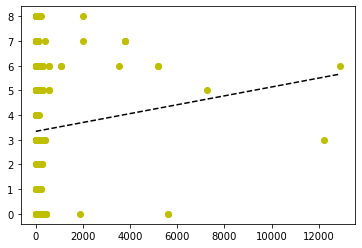

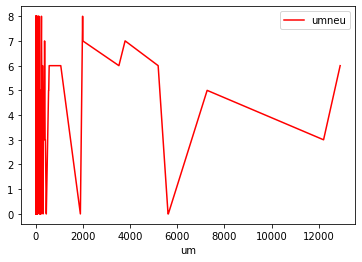

LinregressResult(slope=0.00017958689527172296, intercept=3.3421123416193956, rvalue=0.07955772120854618, pvalue=0.15827950365650467, stderr=0.00012698391037888835)

In [189]:
#Patents

schutz1 = df['schutz1'].dropna()

dfSchutz1IPTrue = df.loc[df['schutz1']=='ja']

dfSchutz1IPTrue = dfSchutz1IPTrue.replace(['x=0','0<x<5','5<=x<10','10<=x<15','15<=x<20',
                                           '20<=x<30','30<=x<50', '50<=x<75', '75<=x<=100'], 
                                          [0,1,2,3,4,5,6,7,8])

dfSchutz1IPTrue['umneu'].fillna(0, inplace=True)
dfSchutz1IPTrue['um'].fillna(0, inplace=True)
dfSchutz1IPTrue = dfSchutz1IPTrue.sort_values(by=['um'], ascending=True)
print(dfSchutz1IPTrue)
x = dfSchutz1IPTrue['um']
y = dfSchutz1IPTrue['umneu']
coef = np.polyfit(x, y, 1)
polynomialFn = np.poly1d(coef)
pl.plot(x, y, 'yo', x, polynomialFn(x), '--k')
dfSchutz1IPTrue.plot(kind='line', x='um', y= 'umneu', color='red')
#Je ziet duidelijk nog niet echt een verband tss revenue en percentueel rev 
#door innovatie. We zullen dus per branche moeten zien hoeveel percentueel innovatie
#bijdraagt per branche.
plt.show()
#P-waarde is ook te hoog : 0.15 > 0.05 om signifivant te zijn
linregress(x, y)

               branche     umneu
0            Bank/Vers  7.000000
1              Bergbau  0.666667
2               Chemie  4.058824
3            EDV/Telek  4.000000
4             EHandKfz  4.000000
5             ETechnik  4.923077
6         ErnaehrTabak  3.000000
7          Fahrzeugbau  5.071429
8              GHandel  2.733333
9          GlasKeramik  3.600000
10          HolzPapier  3.750000
11          Kunststoff  3.526316
12                MMSR  4.833333
13        Maschinenbau  4.500000
14              Metall  4.300000
15              Moebel  3.000000
16            Sonst.DL  0.000000
17              TechDL  5.093750
18              Textil  1.500000
19                 UDL  6.000000
20        Verkehr/Post       NaN
21  Wohnung/Vermietung  0.000000


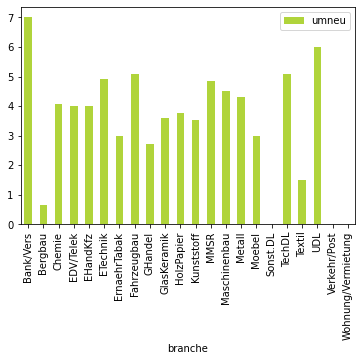

In [190]:
'''Stappenplan percentueel te werk gaan: 
    1. Filter op basis van ip
    2. Maak van de percentages rev door inno een numerieke voorstelling zoals 
    eerder al gedaan
    3. Per branche het gemiddelde tonen aan percentages
    
'''
#Patent

#filter op alle bedrijven met een patent en check hun % aan revenue door innovatieve prodcuten
dfCommon = dataSet.filter(items=['branche', 'umneu', 'schutz1'])
dfCommon = dfCommon.replace(['x=0','0<x<5','5<=x<10','10<=x<15','15<=x<20',
                                           '20<=x<30','30<=x<50', '50<=x<75', '75<=x<=100'], 
                                          [0,1,2,3,4,5,6,7,8])
dfCommon = dfCommon.loc[dfCommon['schutz1']=='ja']
dfCommon['branche'].unique()
patentAnalysis = dfCommon.groupby('branche', as_index=False)['umneu'].mean()
print(patentAnalysis)
patentAnalysis.plot(kind='bar', x='branche', y= 'umneu', color='#b0d43b')


           branche  umneu schutz2
15     Fahrzeugbau    NaN      ja
30         GHandel    3.0      ja
36      HolzPapier    0.0      ja
40      Kunststoff    1.0      ja
53       EDV/Telek    NaN      ja
...            ...    ...     ...
1974          MMSR    6.0      ja
1975        Metall    8.0      ja
1978      Sonst.DL    0.0      ja
1984     EDV/Telek    3.0      ja
1988  Maschinenbau    3.0      ja

[230 rows x 3 columns]
               branche     umneu
0              Bergbau  0.000000
1               Chemie  2.000000
2            EDV/Telek  5.500000
3             EHandKfz  0.000000
4             ETechnik  4.538462
5         ErnaehrTabak  2.333333
6          Fahrzeugbau  5.800000
7              GHandel  2.842105
8          GlasKeramik  3.600000
9           HolzPapier  3.250000
10          Kunststoff  3.210526
11                MMSR  4.363636
12        Maschinenbau  3.541667
13              Metall  3.461538
14              Moebel  3.000000
15            Sonst.DL  1.666667
16     

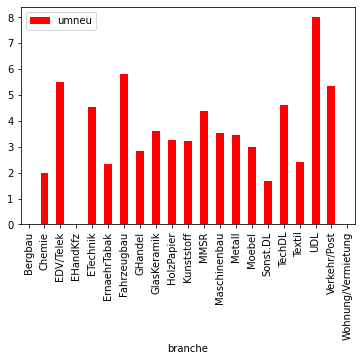

In [10]:
#Prototype

#filter op alle bedrijven met een prototype IP en check hun % aan revenue door innovatieve prodcuten
dfCommon2 = dataSet.filter(items=['branche', 'umneu', 'schutz2'])
dfCommon2 = dfCommon2.replace(['x=0','0<x<5','5<=x<10','10<=x<15','15<=x<20',
                                           '20<=x<30','30<=x<50', '50<=x<75', '75<=x<=100'],
                                          [0,1,2,3,4,5,6,7,8])

dfCommon2 = dfCommon2.loc[dfCommon2['schutz2']=='ja']
dfCommon2['branche'].unique()
prototypeAnalysis = dfCommon2.groupby('branche', as_index=False)['umneu'].mean()
print(prototypeAnalysis)
prototypeAnalysis.plot(kind='bar', x='branche', y= 'umneu', color='#b0d43b')


               branche     umneu
0            Bank/Vers  2.105882
1              Bergbau  0.653846
2               Chemie  2.729167
3            EDV/Telek  4.136364
4             EHandKfz  1.216216
5             ETechnik  4.063492
6         ErnaehrTabak  1.745098
7          Fahrzeugbau  3.093750
8              GHandel  1.285714
9          GlasKeramik  2.000000
10          HolzPapier  2.526316
11          Kunststoff  2.372881
12                MMSR  4.250000
13        Maschinenbau  3.062500
14              Metall  1.666667
15              Moebel  1.764706
16            Sonst.DL  1.409836
17              TechDL  2.744186
18              Textil  1.475000
19                 UDL  2.639344
20        Verkehr/Post  0.669355
21  Wohnung/Vermietung  0.416667


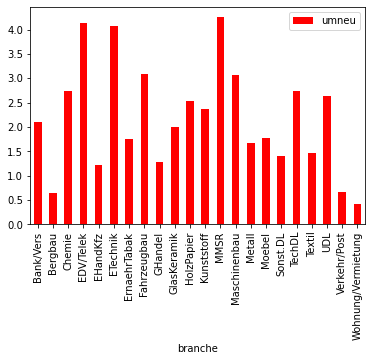

In [11]:

#Brands

#filter op alle bedrijven met een brands IP en check hun % aan revenue door innovatieve prodcuten
dfCommon3 = dataSet.filter(items=['branche', 'umneu', 'schutz3'])
dfCommon3 = dfCommon3.replace(['x=0','0<x<5','5<=x<10','10<=x<15','15<=x<20',
                                           '20<=x<30','30<=x<50', '50<=x<75', '75<=x<=100'],
                                          [0,1,2,3,4,5,6,7,8])
dfCommon3 = dfCommon3.loc[dfCommon3['schutz3']=='ja']

dfCommon3['branche'].unique()
brandsAnalysis = dfCommon3.groupby('branche', as_index=False)['umneu'].mean()
print(brandsAnalysis)
brandsAnalysis.plot(kind='bar', x='branche', y= 'umneu', color='#b0d43b')



In [159]:

#Copyrights

#filter op alle bedrijven met een copyrights en check hun % aan revenue door innovatieve prodcuten
dfCommon4 = dataSet.filter(items=['branche', 'umneu', 'schutz4'])
dfCommon4 = dfCommon4.replace(['x=0','0<x<5','5<=x<10','10<=x<15','15<=x<20',
                                           '20<=x<30','30<=x<50', '50<=x<75', '75<=x<=100'],
                                          [0,1,2,3,4,5,6,7,8])
dfCommon4 = dfCommon4.loc[dfCommon4['schutz4']=='ja']

dfCommon4['branche'].unique()
copyrightsAnalysis = dfCommon4.groupby('branche', as_index=False)['umneu'].mean()
print(copyrightsAnalysis)
copyrightsAnalysis.plot(kind='bar', x='branche', y= 'umneu', color='#b0d43b')



               um       umneu schutz4
0      410.083980         NaN    nein
1       41.936646         NaN     NaN
2        1.829996         x=0    nein
3        3.071281  75<=x<=100    nein
4        1.901261  75<=x<=100      ja
...           ...         ...     ...
1995     0.474227    10<=x<15    nein
1996  1017.291200    50<=x<75     NaN
1997     2.526801         x=0    nein
1998     0.248527         NaN    nein
1999     4.051942         x=0    nein

[2000 rows x 3 columns]


In [160]:

#Confidentiality

#filter op alle bedrijven met een confidentiality en check hun % aan revenue door innovatieve prodcuten

dfCommon5 = dataSet.filter(items=['branche', 'umneu', 'schutz5'])
dfCommon5 = dfCommon5.replace(['x=0','0<x<5','5<=x<10','10<=x<15','15<=x<20',
                                           '20<=x<30','30<=x<50', '50<=x<75', '75<=x<=100'],
                                          [0,1,2,3,4,5,6,7,8])
dfCommon5 = dfCommon5.loc[dfCommon5['schutz5']=='ja']

dfCommon5['branche'].unique()
confidentialityAnalysis = dfCommon5.groupby('branche', as_index=False)['umneu'].mean()
print(confidentialityAnalysis)
confidentialityAnalysis.plot(kind='bar', x='branche', y= 'umneu', color='#b0d43b')


,um,umneu,schutz4
0,410.083980,NaN,nein
2,1.829996,x=0,nein
3,3.071281,75<=x<=100,nein
5,4.129015,x=0,nein
6,2.382081,x=0,nein
...,...,...,...
1994,1.034749,x=0,nein
1995,0.474227,10<=x<15,nein
1997,2.526801,x=0,nein
1998,0.248527,NaN,nein


                um  umneu schutz4
996       0.000000    0.0      ja
752       0.000000    0.0      ja
393       0.000000    0.0      ja
731       0.076848    0.0      ja
443       0.214861    0.0      ja
...            ...    ...     ...
1974   5186.966000    6.0      ja
389    5189.144000    6.0      ja
371    5608.280300    0.0      ja
724    5620.295400    0.0      ja
1731  12204.173000    3.0      ja

[117 rows x 3 columns]


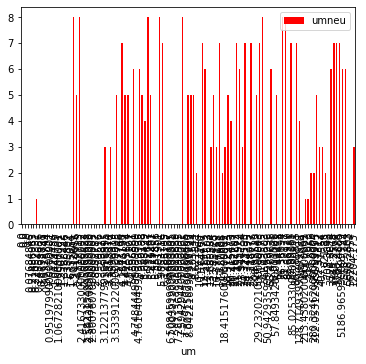

In [161]:

#Complex design

#filter op alle bedrijven met een complex design IP en check hun % aan revenue door innovatieve prodcuten

dfCommon6 = dataSet.filter(items=['branche', 'umneu', 'schutz6'])
dfCommon6 = dfCommon6.replace(['x=0','0<x<5','5<=x<10','10<=x<15','15<=x<20',
                                           '20<=x<30','30<=x<50', '50<=x<75', '75<=x<=100'],
                                          [0,1,2,3,4,5,6,7,8])
dfCommon6 = dfCommon6.loc[dfCommon6['schutz6']=='ja']

dfCommon6['branche'].unique()
complexdesignAnalysis = dfCommon6.groupby('branche', as_index=False)['umneu'].mean()
print(complexdesignAnalysis)
complexdesignAnalysis.plot(kind='bar', x='branche', y= 'umneu', color='#b0d43b')


               branche     umneu
0            Bank/Vers  3.466667
1              Bergbau  0.666667
2               Chemie  3.600000
3            EDV/Telek  4.750000
4             EHandKfz  4.777778
5             ETechnik  4.648649
6         ErnaehrTabak  2.214286
7          Fahrzeugbau  5.125000
8              GHandel  2.923077
9          GlasKeramik  4.142857
10          HolzPapier  4.285714
11          Kunststoff  3.576923
12                MMSR  4.870968
13        Maschinenbau  3.784615
14              Metall  3.454545
15              Moebel  3.400000
16            Sonst.DL  2.578947
17              TechDL  5.228571
18              Textil  2.555556
19                 UDL  4.785714
20        Verkehr/Post  2.333333
21  Wohnung/Vermietung  1.000000


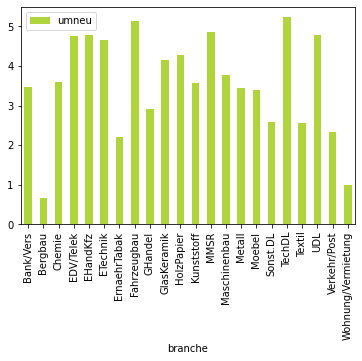

In [191]:

#advantage due to headstart

#filter op alle bedrijven met een advantage due to headstart IP en check hun % aan revenue door innovatieve prodcuten
dfCommon7 = dataSet.filter(items=['branche', 'umneu', 'schutz7'])
dfCommon7 = dfCommon7.replace(['x=0','0<x<5','5<=x<10','10<=x<15','15<=x<20',
                                           '20<=x<30','30<=x<50', '50<=x<75', '75<=x<=100'],
                                          [0,1,2,3,4,5,6,7,8])
dfCommon7 = dfCommon7.loc[dfCommon7['schutz7']=='ja']

dfCommon7['branche'].unique()
advantageduetoheadstartAnalysis = dfCommon7.groupby('branche', as_index=False)['umneu'].mean()
print(advantageduetoheadstartAnalysis)
advantageduetoheadstartAnalysis.plot(kind='bar', x='branche', y= 'umneu', color='#b0d43b')
